In [1]:
from geo_field_jakob import GeoField
import numpy as np
import sys, warnings
from scipy.linalg import svdvals, svd
import scipy.stats as scist
import pickle
from datetime import date, datetime
import tigramite
from tigramite import data_processing as pp
from utils_pca_fun import *

In [5]:
train = True
run_script = True

components=[3, 5, 10, 15] #
#### folder path to save the PCA Varimax results to
save_folder = './runs/train/' if train else './runs/subsets/' 

plot_loadings = True  
plot_load_folder = './plots/'
plot_load_filename = '-[12, 1, 2].bin'

# file names, variables and regional boundaries
file_names = [
            'ERA5_SST_1940-2024_converted_detrend.nc', 
            # 'ERA5_mean_precipitation_1940-2024_converted_detrend.nc', 
            'PRATE_NCEP_NCAR_Reanalysis_1948-2024.nc',
            # 'PRECIP_NCEP_GPCC_Reanalysis_1948-2019_converted_detrend.nc',
            # 'ERA5_mean_SLP_1940-2024_converted_detrend.nc',
            # 'ERA5_10m-Ucomp_1940-2024_converted_detrend.nc',
            # 'ERA5_2m-temp_1940-2024_converted_detrend.nc'
            ]

variables = [
    'sst', 
    # 'mtpr', 
    'prate',
    # 'precip',
    # 'msl',
    # 'u10',
    # 'd2m'
    ]

# Boundaries of the Niño regions
sst_bounds = {
    'lats': [-66, 48], # ENSO: [-10, 5], # AMO: [0, 70], # FULL, ENSO, AMO
    'lons': [150, 360], # ENSO: [160, -90 + 360] # AMO: [280, 360], 
}

# Boundaries for precipitation ERA5 
mtpr_bounds = {
    'lats': [-20, 1],
    'lons': [310, 325],
}

# Boundaries for precipitation rate NCAR
prate_bounds = {
    'lats': [-20, 1],
    'lons': [310, 325],
}

# Boundaries for the precipitation GPCC
precip_bounds = {
    'lats': [-20, 1],
    'lons': [310, 325],
}

# Boundaries for sea level pressure
slp_bounds = {
    'lats': [-66, 48], # [0, 70], 
    'lons': [150, 360] # [280, 360]
}

# Boundaries for U component of wind
u_bounds = {
    'lats': None,
    'lons': None
}

# Boundaries for 2m dew point temperature
temp_bounds = {
    'lats': None,
    'lons': None
}

boundaries = [
    sst_bounds, 
    # mtpr_bounds,
    prate_bounds,
    # precip_bounds, 
    # slp_bounds,
    # u_bounds,
    # temp_bounds
    ]

if '1940-2024' in file_names[0]:
    train_dates = [datetime(1948, 1, 1), datetime(2024, 1, 1)] # Date_from is inclusive, date_to is not. # Before 2016
    test_dates = [train_dates[1], datetime(2024, 6, 1)]
else:
    train_dates = [datetime(1948, 1, 1), datetime(2024, 1, 1)]

INFO:root:funciona


ERA5_SST_1940-2024_converted_detrend.nc sst {'lats': [-66, 48], 'lons': [150, 360]}
Loading data:
	Original date range 1940-01-01 00:00:00 - 2024-07-01 00:00:00 
Original data shape (1015, 721, 1440)
	Slicing lon = [150, 360], lat = [-66, 48]
	anomalize means_variance with base period (1948, 2022)
Stard and end dates:  1940-01-01 00:00:00 2024-07-01 00:00:00
	Slicing from = 1948-01-01 00:00:00 to 2024-01-01 00:00:00
Stard and end dates after slicing:  1948-01-01 00:00:00 2023-12-01 00:00:00
Preprocessing:
	cos_reweighting by sqrt(cos(lat))
Running script to generate ./runs/train/train_varimax_FULL_ERA5_SST_1940-2024_converted_detrend.nc_3dm_comps-15_months-[2, 3, 4].bin
Get Varimax components
	Get SVD
(912, 457, 840)  data shape after loading
	Compute covariance only from months [2, 3, 4]
	(NOTE: Time series will be all months and mask can be retrieved from dict)
True
(228, 457, 840)  masked data shape before reshape
(228, 383880) (912, 383880) masked and data after reshape
(76, 383880

/Users/cesardiaz/Documents/GitHub/Dissertation_v2/utils_pca_fun.py:441: RuntimeWarning: divide by zero encountered in divide
  period = 1./freq
/Users/cesardiaz/Documents/GitHub/Dissertation_v2/utils_pca_fun.py:441: RuntimeWarning: divide by zero encountered in divide
  period = 1./freq
/Users/cesardiaz/Documents/GitHub/Dissertation_v2/utils_pca_fun.py:441: RuntimeWarning: divide by zero encountered in divide
  period = 1./freq
/Users/cesardiaz/Documents/GitHub/Dissertation_v2/utils_pca_fun.py:441: RuntimeWarning: divide by zero encountered in divide
  period = 1./freq
/Users/cesardiaz/Documents/GitHub/Dissertation_v2/utils_pca_fun.py:441: RuntimeWarning: divide by zero encountered in divide
  period = 1./freq
/Users/cesardiaz/Documents/GitHub/Dissertation_v2/utils_pca_fun.py:441: RuntimeWarning: divide by zero encountered in divide
  period = 1./freq
/Users/cesardiaz/Documents/GitHub/Dissertation_v2/utils_pca_fun.py:441: RuntimeWarning: divide by zero encountered in divide
  period = 

Running script to generate ./runs/train/train_varimax_FULL_ERA5_SST_1940-2024_converted_detrend.nc_3dm_comps-15_months-[5, 6, 7].bin
Get Varimax components
	Get SVD
(912, 457, 840)  data shape after loading
	Compute covariance only from months [5, 6, 7]
	(NOTE: Time series will be all months and mask can be retrieved from dict)
True
(228, 457, 840)  masked data shape before reshape
(228, 383880) (912, 383880) masked and data after reshape
(76, 383880)  masked data shape after binning
V shape (383880, 15)
	User-selected number of components: 15
	Explaining 0.73 of variance
	Varimax rotation
		Varimax iteration 0
		Varimax iteration 10
		Varimax iteration 20
	Further metrics
Vr shape (383880, 15)
Plotting loadings and time series to ./runs/train/train_varimax_FULL_ERA5_SST_1940-2024_converted_detrend.nc_3dm_comps-15_months-[5, 6, 7].bin.pdf
(457, 840, 15) weights shape, check nr timesteps


/Users/cesardiaz/Documents/GitHub/Dissertation_v2/utils_pca_fun.py:441: RuntimeWarning: divide by zero encountered in divide
  period = 1./freq
/Users/cesardiaz/Documents/GitHub/Dissertation_v2/utils_pca_fun.py:441: RuntimeWarning: divide by zero encountered in divide
  period = 1./freq
/Users/cesardiaz/Documents/GitHub/Dissertation_v2/utils_pca_fun.py:441: RuntimeWarning: divide by zero encountered in divide
  period = 1./freq
/Users/cesardiaz/Documents/GitHub/Dissertation_v2/utils_pca_fun.py:441: RuntimeWarning: divide by zero encountered in divide
  period = 1./freq
/Users/cesardiaz/Documents/GitHub/Dissertation_v2/utils_pca_fun.py:441: RuntimeWarning: divide by zero encountered in divide
  period = 1./freq
/Users/cesardiaz/Documents/GitHub/Dissertation_v2/utils_pca_fun.py:398: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To contr

Running script to generate ./runs/train/train_varimax_FULL_ERA5_SST_1940-2024_converted_detrend.nc_3dm_comps-15_months-[8, 9, 10].bin
Get Varimax components
	Get SVD
(912, 457, 840)  data shape after loading
	Compute covariance only from months [8, 9, 10]
	(NOTE: Time series will be all months and mask can be retrieved from dict)
True
(228, 457, 840)  masked data shape before reshape
(228, 383880) (912, 383880) masked and data after reshape
(76, 383880)  masked data shape after binning
V shape (383880, 15)
	User-selected number of components: 15
	Explaining 0.74 of variance
	Varimax rotation
		Varimax iteration 0
		Varimax iteration 10
		Varimax iteration 20
	Further metrics
Vr shape (383880, 15)
Plotting loadings and time series to ./runs/train/train_varimax_FULL_ERA5_SST_1940-2024_converted_detrend.nc_3dm_comps-15_months-[8, 9, 10].bin.pdf
(457, 840, 15) weights shape, check nr timesteps


/Users/cesardiaz/Documents/GitHub/Dissertation_v2/utils_pca_fun.py:441: RuntimeWarning: divide by zero encountered in divide
  period = 1./freq
/Users/cesardiaz/Documents/GitHub/Dissertation_v2/utils_pca_fun.py:441: RuntimeWarning: divide by zero encountered in divide
  period = 1./freq
/Users/cesardiaz/Documents/GitHub/Dissertation_v2/utils_pca_fun.py:441: RuntimeWarning: divide by zero encountered in divide
  period = 1./freq
/Users/cesardiaz/Documents/GitHub/Dissertation_v2/utils_pca_fun.py:441: RuntimeWarning: divide by zero encountered in divide
  period = 1./freq
/Users/cesardiaz/Documents/GitHub/Dissertation_v2/utils_pca_fun.py:441: RuntimeWarning: divide by zero encountered in divide
  period = 1./freq
/Users/cesardiaz/Documents/GitHub/Dissertation_v2/utils_pca_fun.py:441: RuntimeWarning: divide by zero encountered in divide
  period = 1./freq
/Users/cesardiaz/Documents/GitHub/Dissertation_v2/utils_pca_fun.py:441: RuntimeWarning: divide by zero encountered in divide
  period = 

Running script to generate ./runs/train/train_varimax_FULL_ERA5_SST_1940-2024_converted_detrend.nc_3dm_comps-15_months-[11, 12, 1].bin
Get Varimax components
	Get SVD
(912, 457, 840)  data shape after loading
	Compute covariance only from months [11, 12, 1]
	(NOTE: Time series will be all months and mask can be retrieved from dict)
True
(228, 457, 840)  masked data shape before reshape
(228, 383880) (912, 383880) masked and data after reshape
(76, 383880)  masked data shape after binning
V shape (383880, 15)
	User-selected number of components: 15
	Explaining 0.75 of variance
	Varimax rotation
		Varimax iteration 0
		Varimax iteration 10
	Further metrics
Vr shape (383880, 15)
Plotting loadings and time series to ./runs/train/train_varimax_FULL_ERA5_SST_1940-2024_converted_detrend.nc_3dm_comps-15_months-[11, 12, 1].bin.pdf
(457, 840, 15) weights shape, check nr timesteps


/Users/cesardiaz/Documents/GitHub/Dissertation_v2/utils_pca_fun.py:441: RuntimeWarning: divide by zero encountered in divide
  period = 1./freq
/Users/cesardiaz/Documents/GitHub/Dissertation_v2/utils_pca_fun.py:441: RuntimeWarning: divide by zero encountered in divide
  period = 1./freq
/Users/cesardiaz/Documents/GitHub/Dissertation_v2/utils_pca_fun.py:441: RuntimeWarning: divide by zero encountered in divide
  period = 1./freq
/Users/cesardiaz/Documents/GitHub/Dissertation_v2/utils_pca_fun.py:441: RuntimeWarning: divide by zero encountered in divide
  period = 1./freq
/Users/cesardiaz/Documents/GitHub/Dissertation_v2/utils_pca_fun.py:441: RuntimeWarning: divide by zero encountered in divide
  period = 1./freq
/Users/cesardiaz/Documents/GitHub/Dissertation_v2/utils_pca_fun.py:441: RuntimeWarning: divide by zero encountered in divide
  period = 1./freq
/Users/cesardiaz/Documents/GitHub/Dissertation_v2/utils_pca_fun.py:441: RuntimeWarning: divide by zero encountered in divide
  period = 

PRATE_NCEP_NCAR_Reanalysis_1948-2024.nc prate {'lats': [-20, 1], 'lons': [310, 325]}
Loading data:
	Original date range 1948-01-01 00:00:00 - 2024-06-01 00:00:00 
Original data shape (918, 94, 192)
	Slicing lon = [310, 325], lat = [-20, 1]
	anomalize means_variance with base period (1948, 2022)
Stard and end dates:  1948-01-01 00:00:00 2024-06-01 00:00:00
	Slicing from = 1948-01-01 00:00:00 to 2024-01-01 00:00:00
Stard and end dates after slicing:  1948-01-01 00:00:00 2023-12-01 00:00:00
Preprocessing:
	cos_reweighting by sqrt(cos(lat))
Running script to generate ./runs/train/train_varimax_PRATE_NCEP_NCAR_Reanalysis_1948-2024.nc_3dm_comps-15_months-[2, 3, 4].bin
Get Varimax components
	Get SVD
(912, 12, 8)  data shape after loading
	Compute covariance only from months [2, 3, 4]
	(NOTE: Time series will be all months and mask can be retrieved from dict)
True
(228, 12, 8)  masked data shape before reshape
(228, 96) (912, 96) masked and data after reshape
(76, 96)  masked data shape after

/Users/cesardiaz/Documents/GitHub/Dissertation_v2/utils_pca_fun.py:441: RuntimeWarning: divide by zero encountered in divide
  period = 1./freq
/Users/cesardiaz/Documents/GitHub/Dissertation_v2/utils_pca_fun.py:441: RuntimeWarning: divide by zero encountered in divide
  period = 1./freq
/Users/cesardiaz/Documents/GitHub/Dissertation_v2/utils_pca_fun.py:441: RuntimeWarning: divide by zero encountered in divide
  period = 1./freq
/Users/cesardiaz/Documents/GitHub/Dissertation_v2/utils_pca_fun.py:441: RuntimeWarning: divide by zero encountered in divide
  period = 1./freq
/Users/cesardiaz/Documents/GitHub/Dissertation_v2/utils_pca_fun.py:441: RuntimeWarning: divide by zero encountered in divide
  period = 1./freq
/Users/cesardiaz/Documents/GitHub/Dissertation_v2/utils_pca_fun.py:441: RuntimeWarning: divide by zero encountered in divide
  period = 1./freq
/Users/cesardiaz/Documents/GitHub/Dissertation_v2/utils_pca_fun.py:441: RuntimeWarning: divide by zero encountered in divide
  period = 

Running script to generate ./runs/train/train_varimax_PRATE_NCEP_NCAR_Reanalysis_1948-2024.nc_3dm_comps-15_months-[5, 6, 7].bin
Get Varimax components
	Get SVD
(912, 12, 8)  data shape after loading
	Compute covariance only from months [5, 6, 7]
	(NOTE: Time series will be all months and mask can be retrieved from dict)
True
(228, 12, 8)  masked data shape before reshape
(228, 96) (912, 96) masked and data after reshape
(76, 96)  masked data shape after binning
V shape (96, 15)
	User-selected number of components: 15
	Explaining 0.95 of variance
	Varimax rotation
		Varimax iteration 0
		Varimax iteration 10
	Further metrics
Vr shape (96, 15)
Plotting loadings and time series to ./runs/train/train_varimax_PRATE_NCEP_NCAR_Reanalysis_1948-2024.nc_3dm_comps-15_months-[5, 6, 7].bin.pdf
(12, 8, 15) weights shape, check nr timesteps


/Users/cesardiaz/Documents/GitHub/Dissertation_v2/utils_pca_fun.py:441: RuntimeWarning: divide by zero encountered in divide
  period = 1./freq
/Users/cesardiaz/Documents/GitHub/Dissertation_v2/utils_pca_fun.py:441: RuntimeWarning: divide by zero encountered in divide
  period = 1./freq
/Users/cesardiaz/Documents/GitHub/Dissertation_v2/utils_pca_fun.py:441: RuntimeWarning: divide by zero encountered in divide
  period = 1./freq
/Users/cesardiaz/Documents/GitHub/Dissertation_v2/utils_pca_fun.py:441: RuntimeWarning: divide by zero encountered in divide
  period = 1./freq
/Users/cesardiaz/Documents/GitHub/Dissertation_v2/utils_pca_fun.py:441: RuntimeWarning: divide by zero encountered in divide
  period = 1./freq
/Users/cesardiaz/Documents/GitHub/Dissertation_v2/utils_pca_fun.py:441: RuntimeWarning: divide by zero encountered in divide
  period = 1./freq
/Users/cesardiaz/Documents/GitHub/Dissertation_v2/utils_pca_fun.py:441: RuntimeWarning: divide by zero encountered in divide
  period = 

Running script to generate ./runs/train/train_varimax_PRATE_NCEP_NCAR_Reanalysis_1948-2024.nc_3dm_comps-15_months-[8, 9, 10].bin
Get Varimax components
	Get SVD
(912, 12, 8)  data shape after loading
	Compute covariance only from months [8, 9, 10]
	(NOTE: Time series will be all months and mask can be retrieved from dict)
True
(228, 12, 8)  masked data shape before reshape
(228, 96) (912, 96) masked and data after reshape
(76, 96)  masked data shape after binning
V shape (96, 15)
	User-selected number of components: 15
	Explaining 0.95 of variance
	Varimax rotation
		Varimax iteration 0
		Varimax iteration 10
	Further metrics
Vr shape (96, 15)
Plotting loadings and time series to ./runs/train/train_varimax_PRATE_NCEP_NCAR_Reanalysis_1948-2024.nc_3dm_comps-15_months-[8, 9, 10].bin.pdf
(12, 8, 15) weights shape, check nr timesteps


/Users/cesardiaz/Documents/GitHub/Dissertation_v2/utils_pca_fun.py:441: RuntimeWarning: divide by zero encountered in divide
  period = 1./freq
/Users/cesardiaz/Documents/GitHub/Dissertation_v2/utils_pca_fun.py:441: RuntimeWarning: divide by zero encountered in divide
  period = 1./freq
/Users/cesardiaz/Documents/GitHub/Dissertation_v2/utils_pca_fun.py:441: RuntimeWarning: divide by zero encountered in divide
  period = 1./freq
/Users/cesardiaz/Documents/GitHub/Dissertation_v2/utils_pca_fun.py:441: RuntimeWarning: divide by zero encountered in divide
  period = 1./freq
/Users/cesardiaz/Documents/GitHub/Dissertation_v2/utils_pca_fun.py:441: RuntimeWarning: divide by zero encountered in divide
  period = 1./freq
/Users/cesardiaz/Documents/GitHub/Dissertation_v2/utils_pca_fun.py:441: RuntimeWarning: divide by zero encountered in divide
  period = 1./freq
/Users/cesardiaz/Documents/GitHub/Dissertation_v2/utils_pca_fun.py:441: RuntimeWarning: divide by zero encountered in divide
  period = 

Running script to generate ./runs/train/train_varimax_PRATE_NCEP_NCAR_Reanalysis_1948-2024.nc_3dm_comps-15_months-[11, 12, 1].bin
Get Varimax components
	Get SVD
(912, 12, 8)  data shape after loading
	Compute covariance only from months [11, 12, 1]
	(NOTE: Time series will be all months and mask can be retrieved from dict)
True
(228, 12, 8)  masked data shape before reshape
(228, 96) (912, 96) masked and data after reshape
(76, 96)  masked data shape after binning
V shape (96, 15)
	User-selected number of components: 15
	Explaining 0.95 of variance
	Varimax rotation
		Varimax iteration 0
		Varimax iteration 10
	Further metrics
Vr shape (96, 15)
Plotting loadings and time series to ./runs/train/train_varimax_PRATE_NCEP_NCAR_Reanalysis_1948-2024.nc_3dm_comps-15_months-[11, 12, 1].bin.pdf
(12, 8, 15) weights shape, check nr timesteps


/Users/cesardiaz/Documents/GitHub/Dissertation_v2/utils_pca_fun.py:441: RuntimeWarning: divide by zero encountered in divide
  period = 1./freq
/Users/cesardiaz/Documents/GitHub/Dissertation_v2/utils_pca_fun.py:441: RuntimeWarning: divide by zero encountered in divide
  period = 1./freq
/Users/cesardiaz/Documents/GitHub/Dissertation_v2/utils_pca_fun.py:441: RuntimeWarning: divide by zero encountered in divide
  period = 1./freq
/Users/cesardiaz/Documents/GitHub/Dissertation_v2/utils_pca_fun.py:441: RuntimeWarning: divide by zero encountered in divide
  period = 1./freq
/Users/cesardiaz/Documents/GitHub/Dissertation_v2/utils_pca_fun.py:441: RuntimeWarning: divide by zero encountered in divide
  period = 1./freq
/Users/cesardiaz/Documents/GitHub/Dissertation_v2/utils_pca_fun.py:441: RuntimeWarning: divide by zero encountered in divide
  period = 1./freq
/Users/cesardiaz/Documents/GitHub/Dissertation_v2/utils_pca_fun.py:441: RuntimeWarning: divide by zero encountered in divide
  period = 

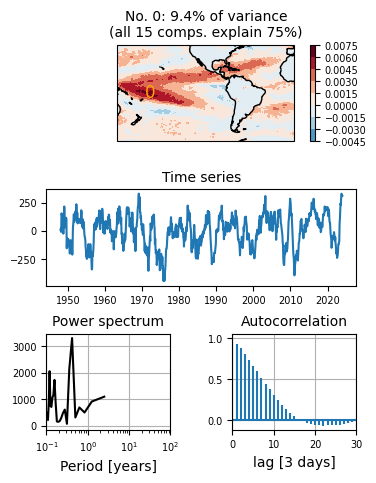

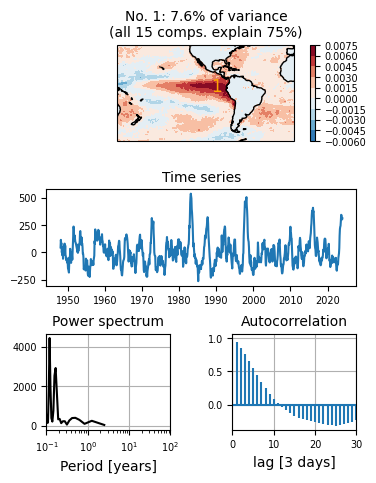

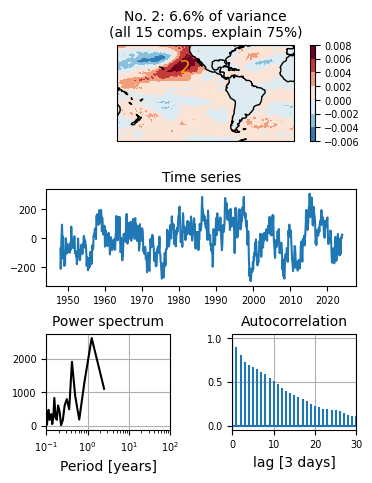

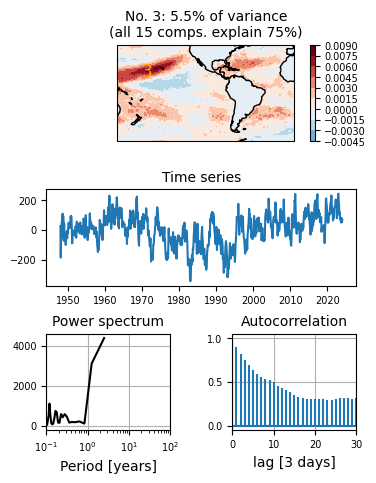

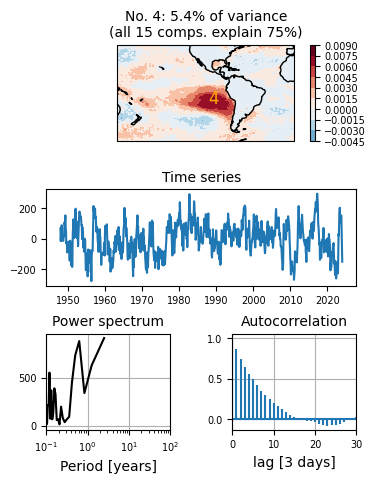

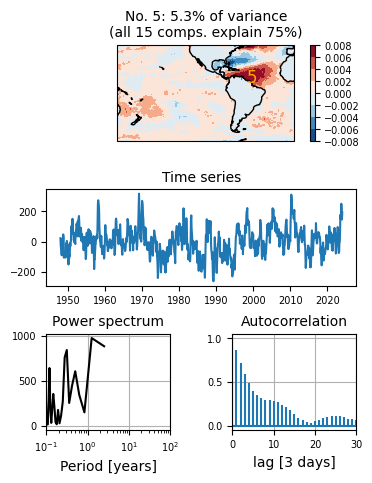

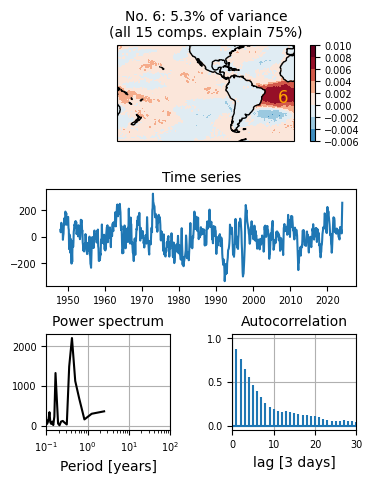

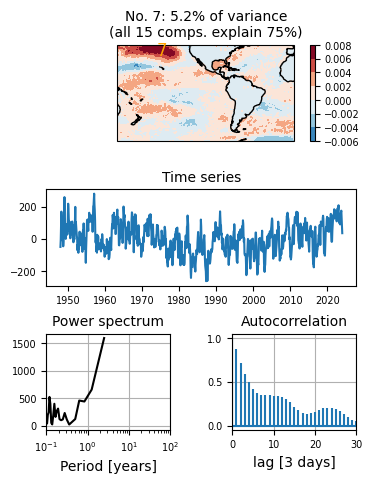

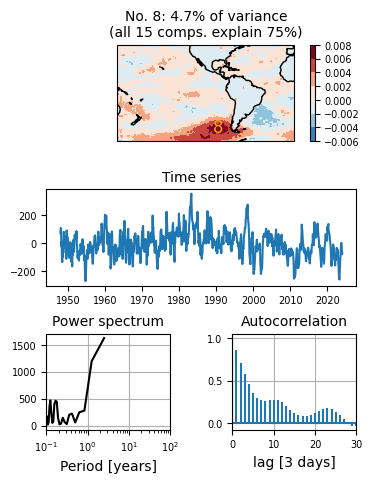

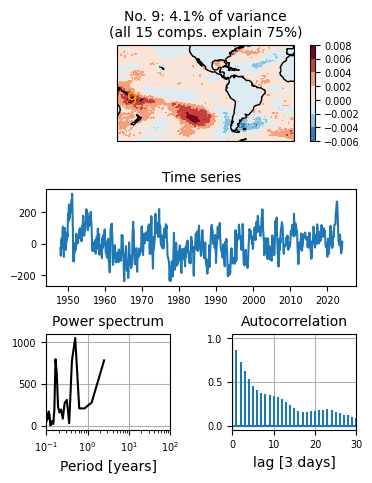

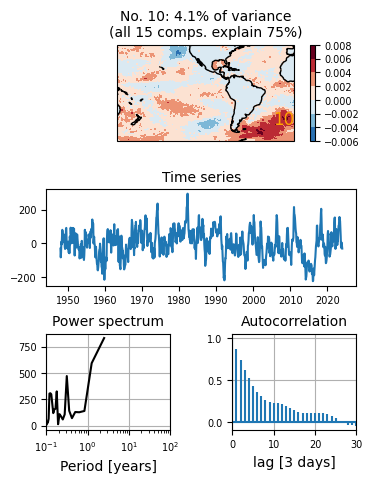

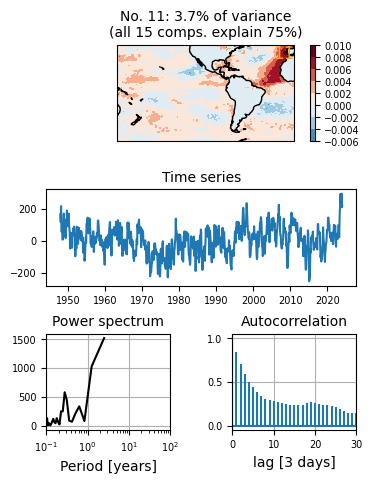

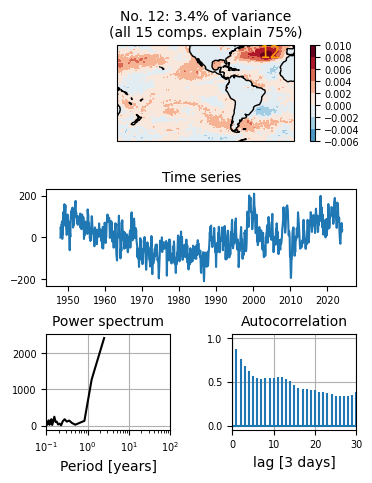

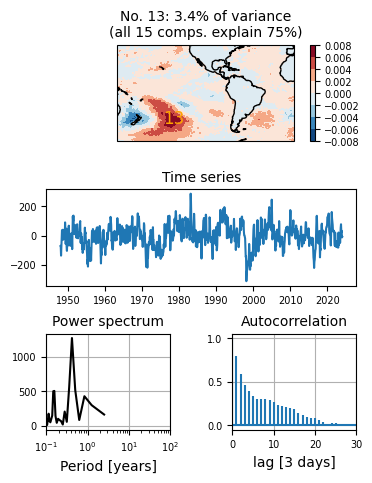

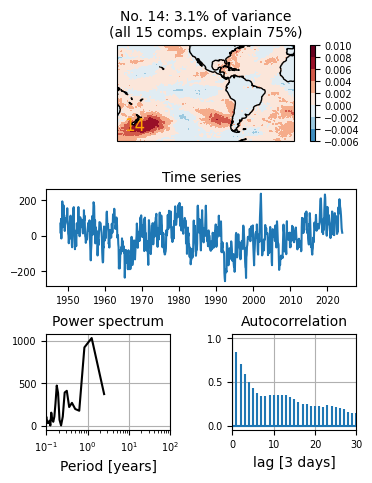

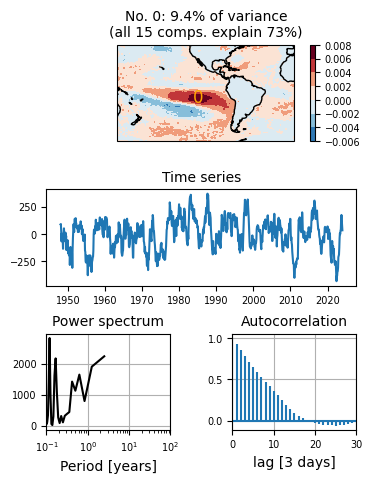

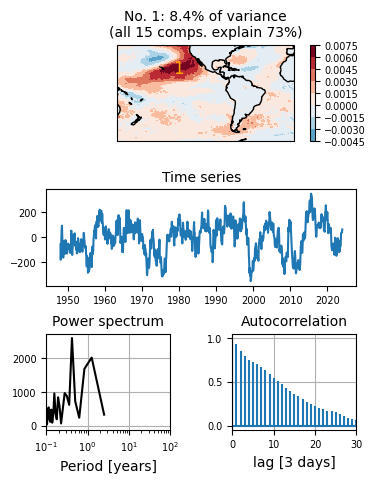

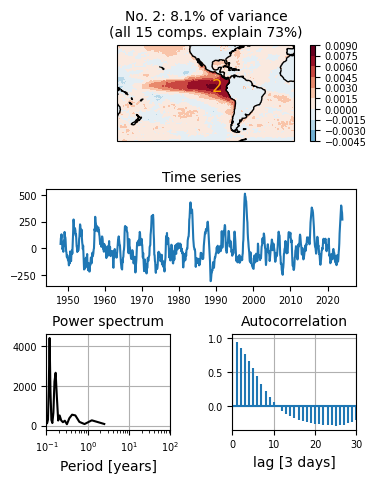

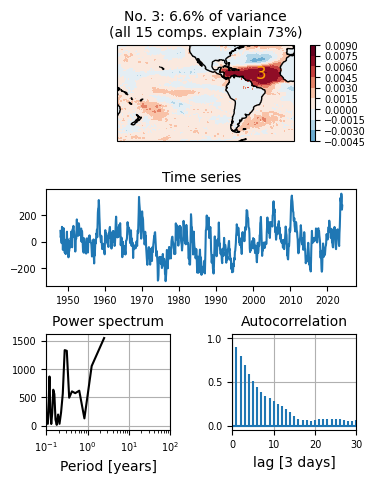

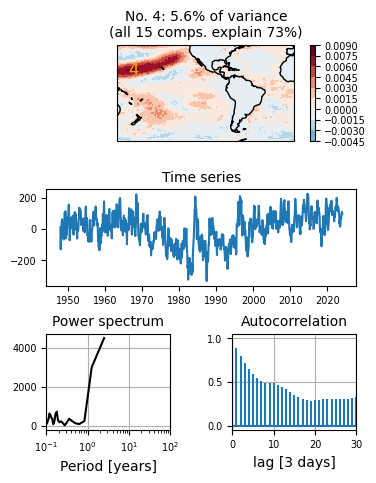

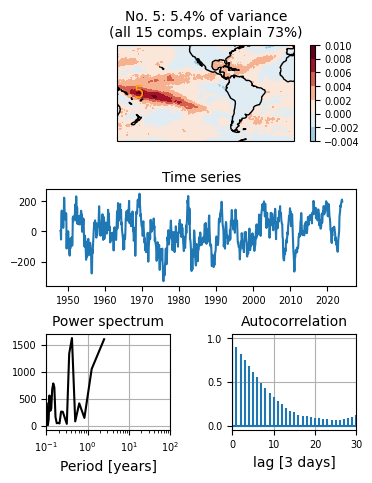

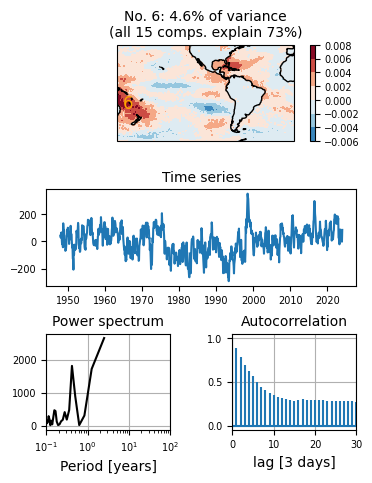

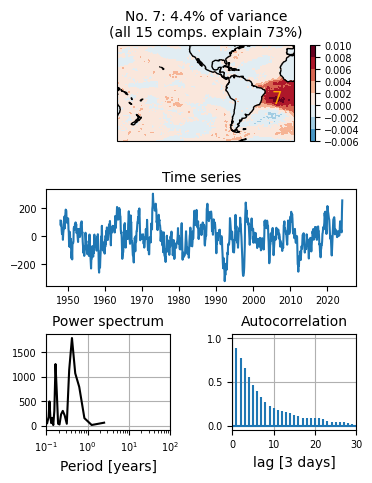

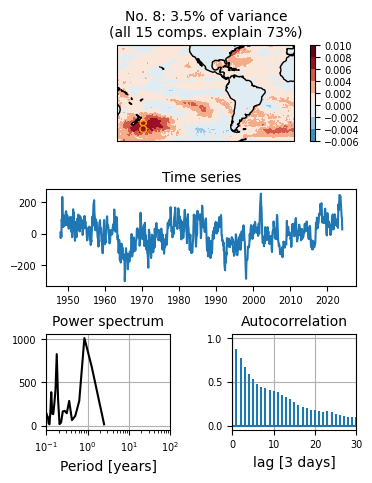

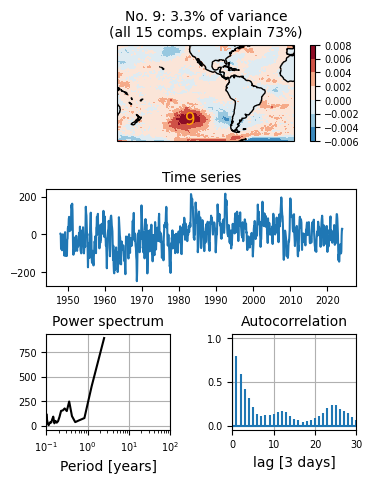

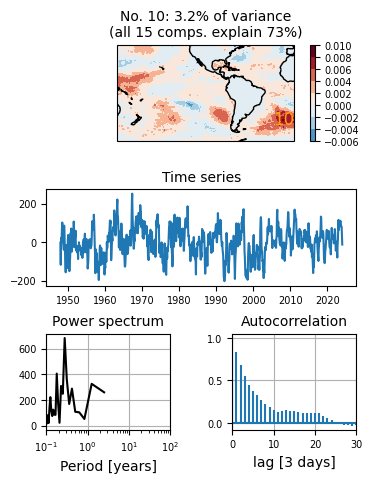

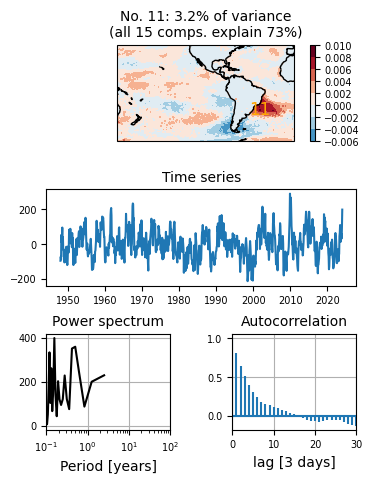

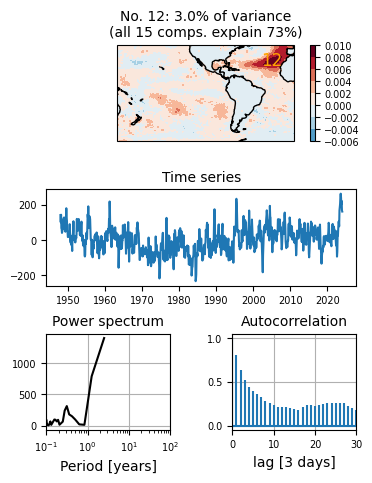

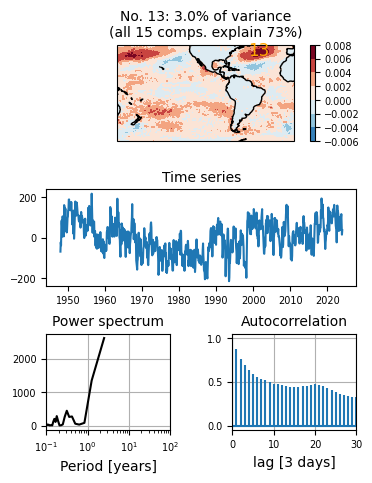

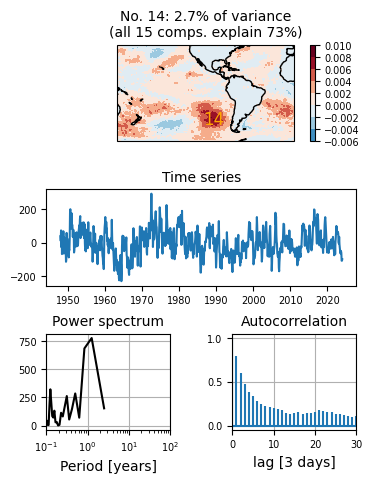

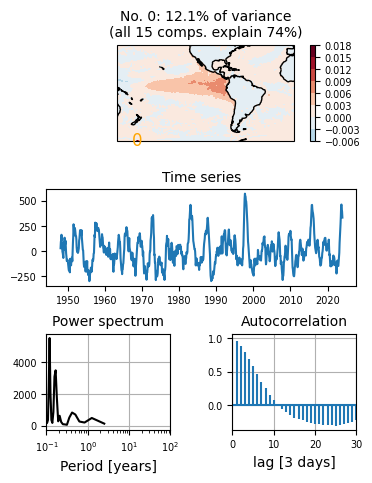

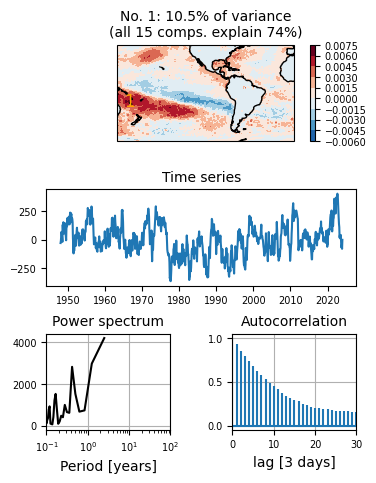

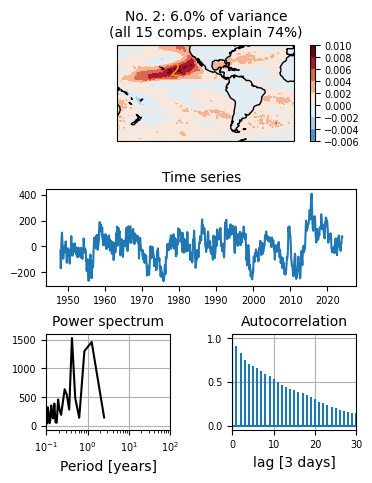

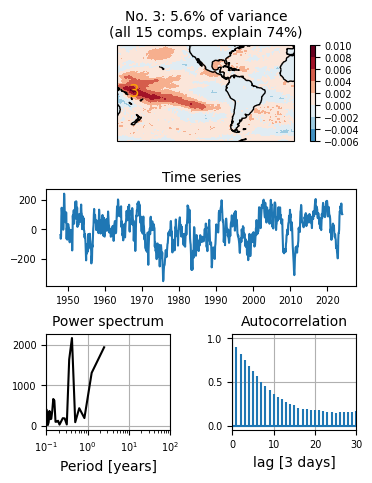

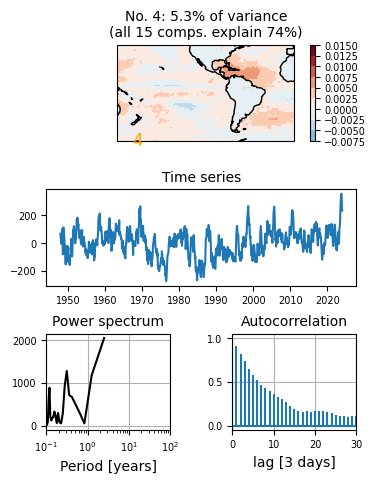

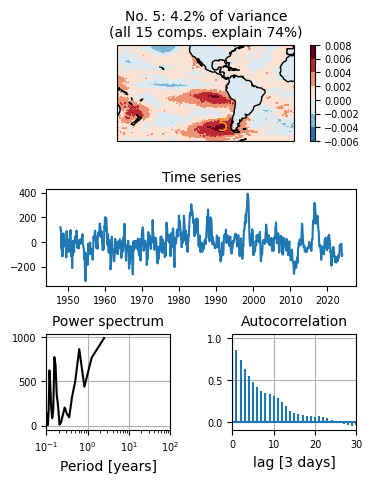

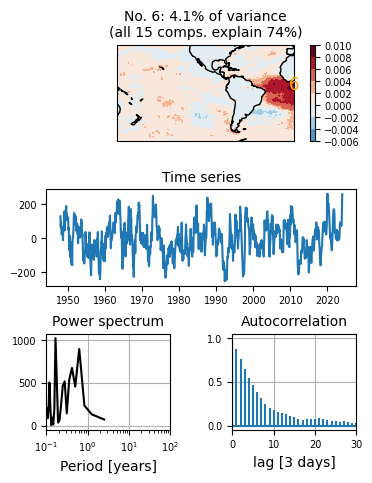

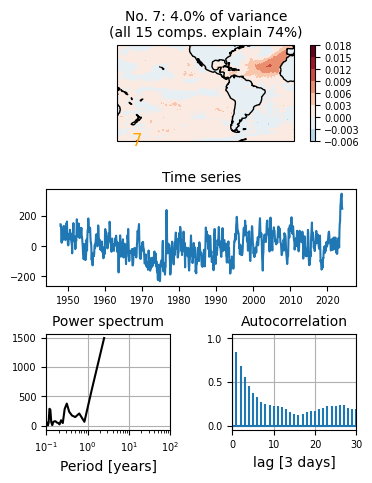

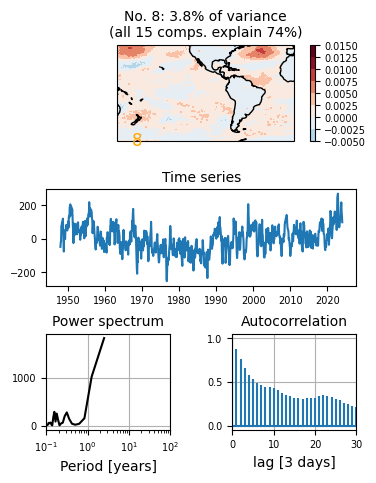

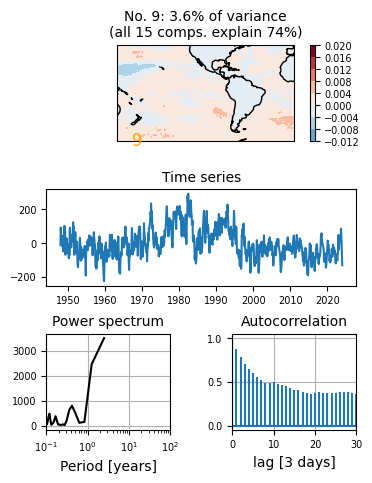

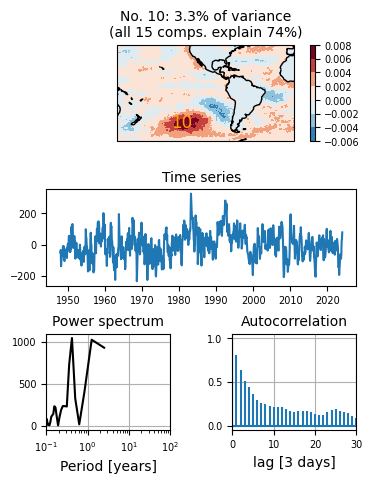

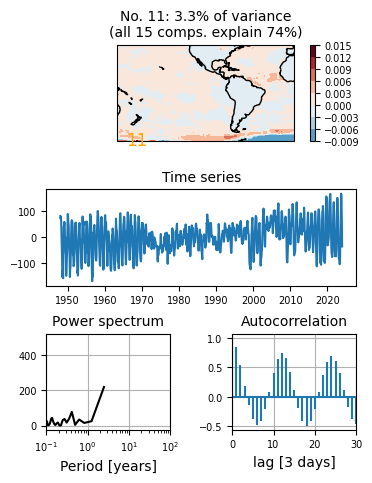

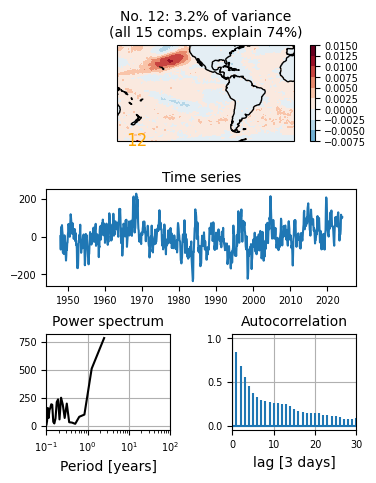

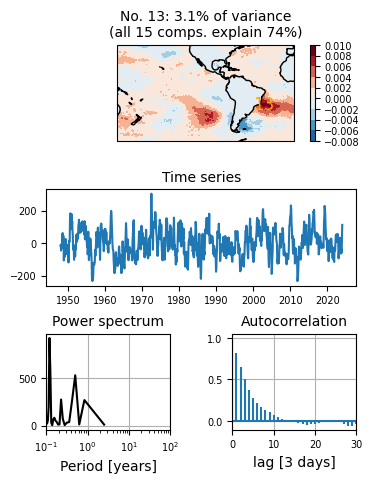

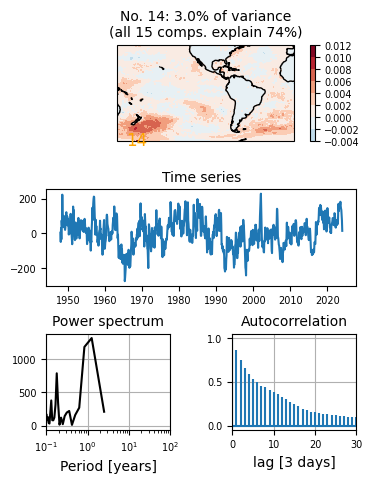

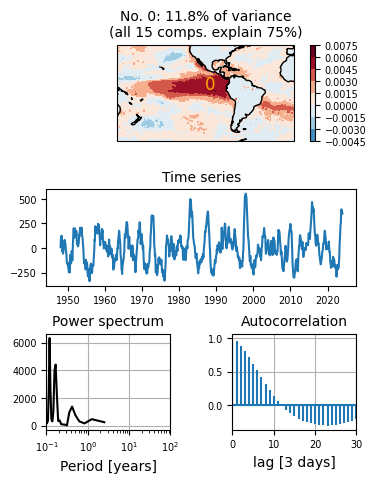

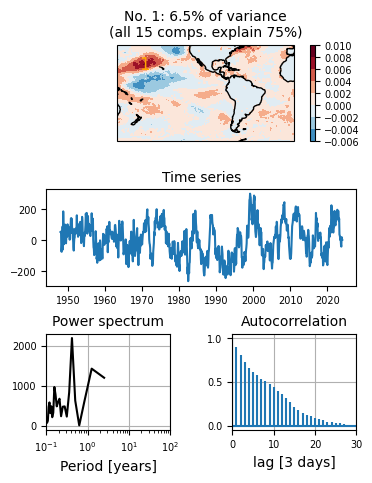

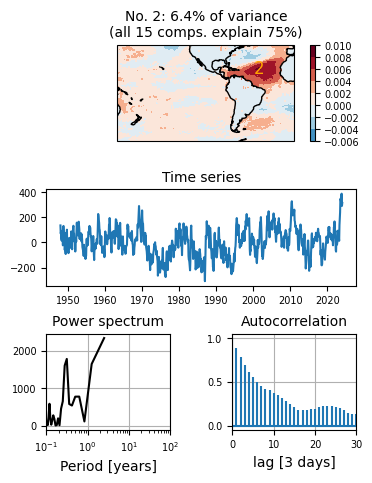

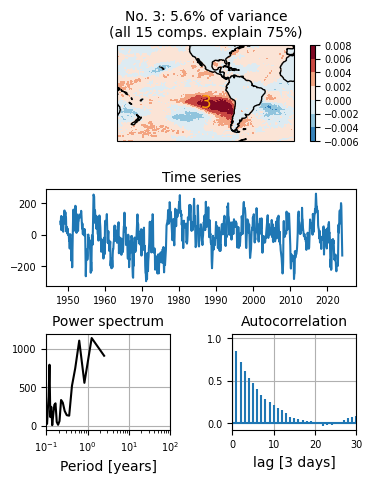

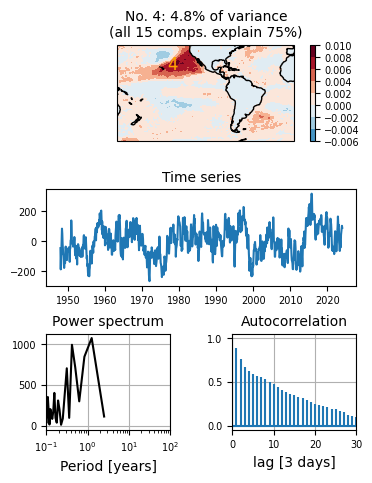

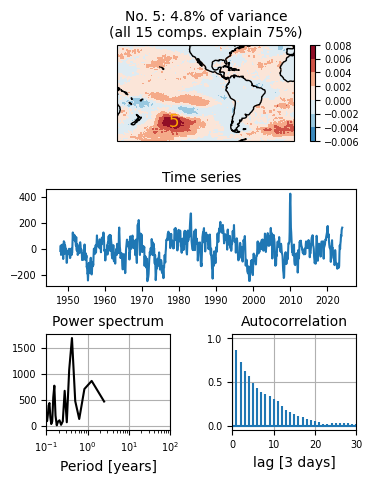

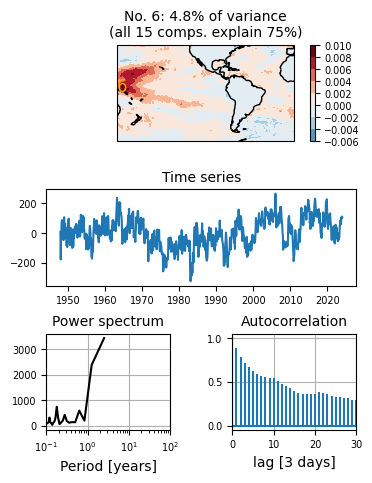

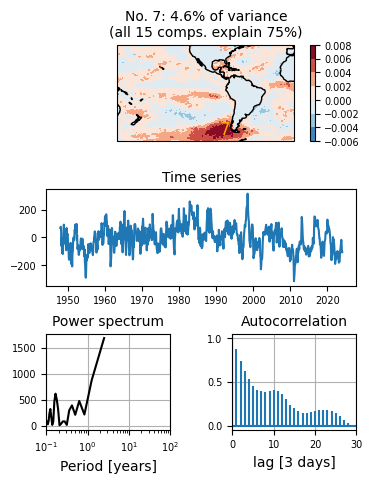

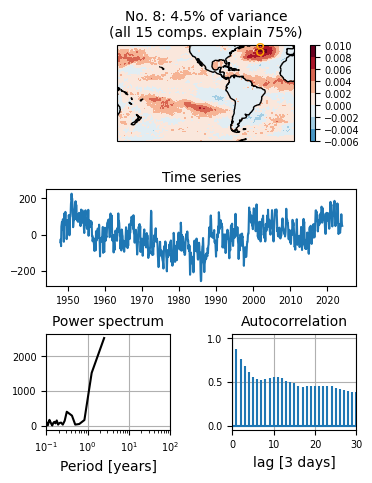

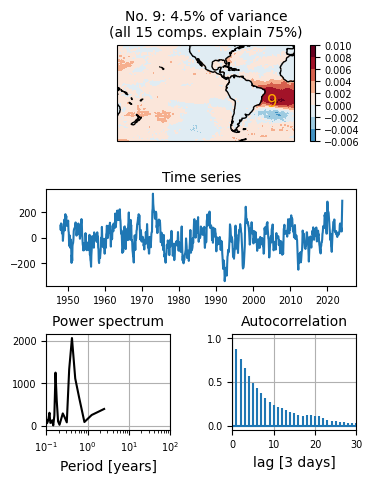

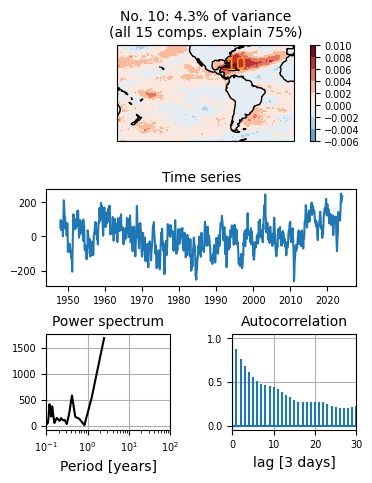

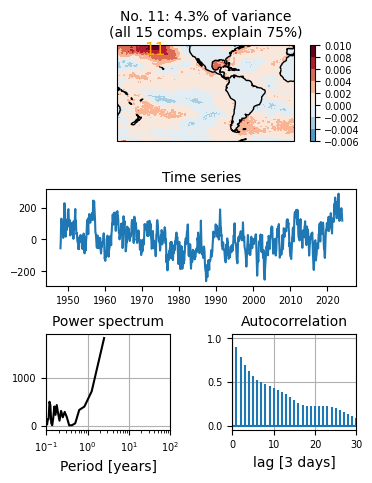

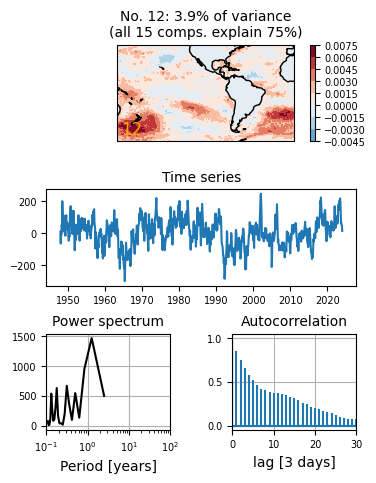

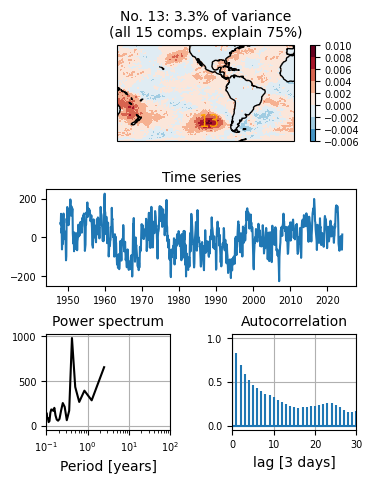

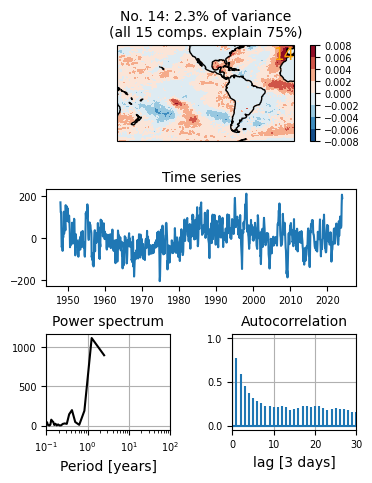

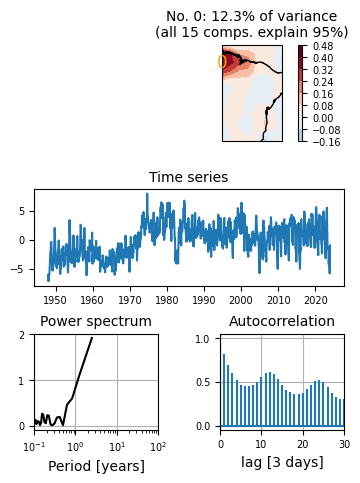

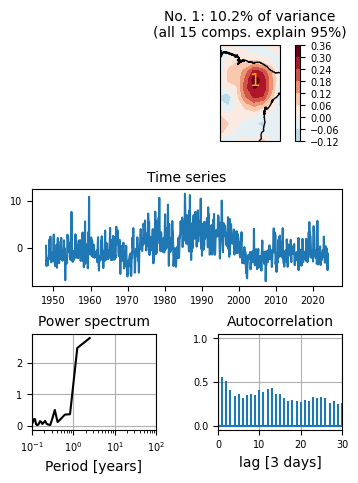

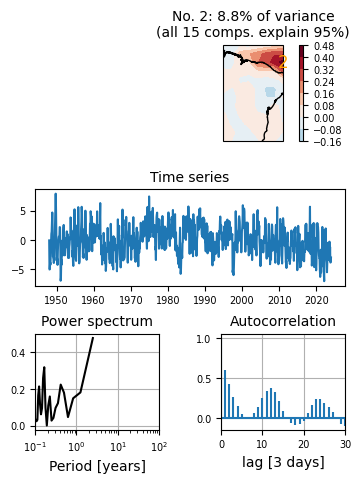

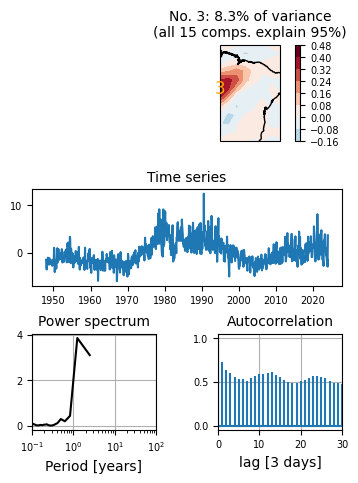

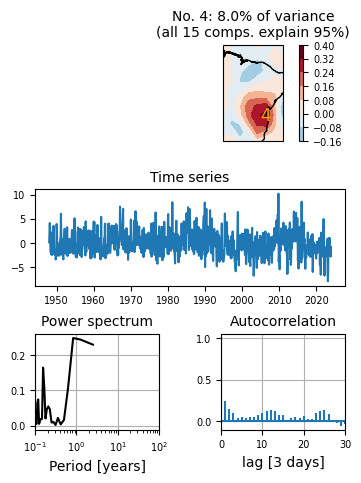

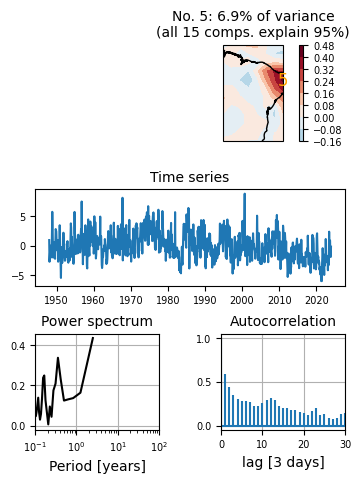

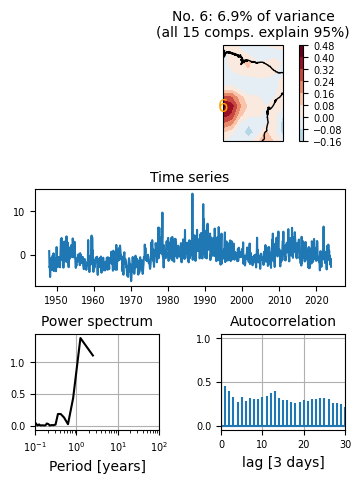

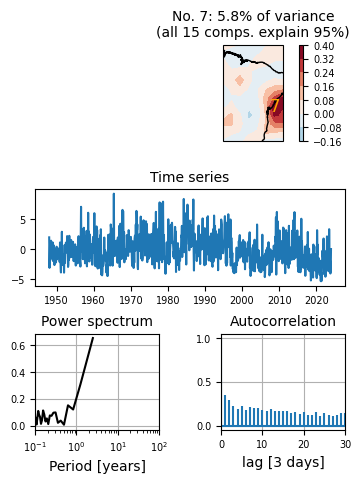

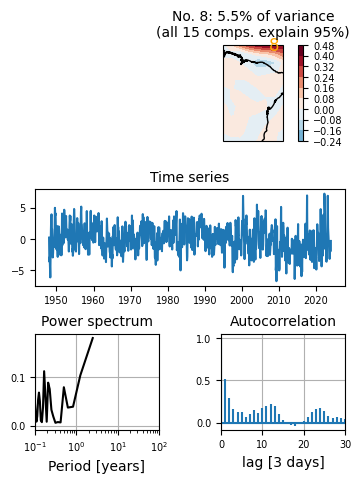

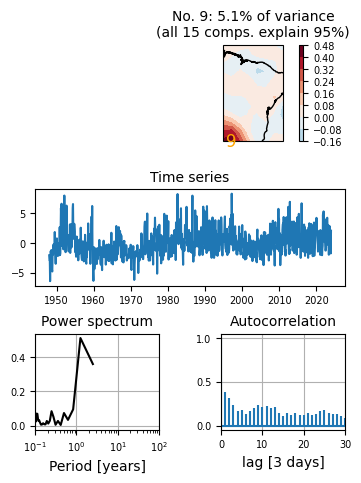

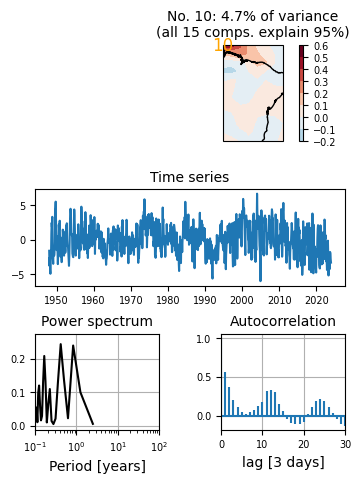

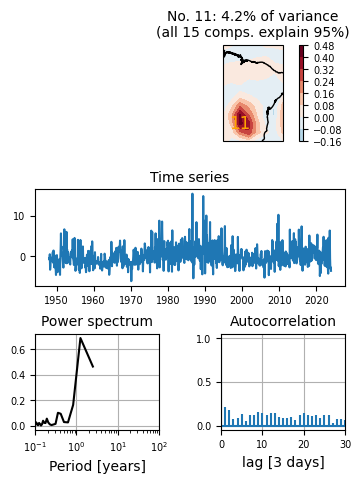

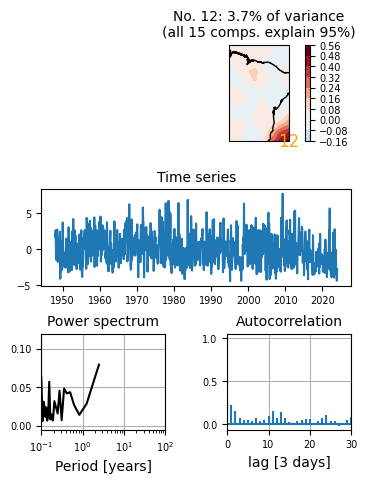

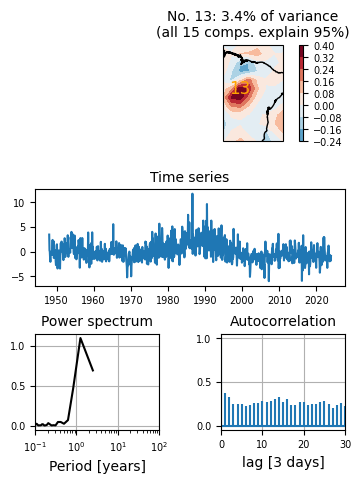

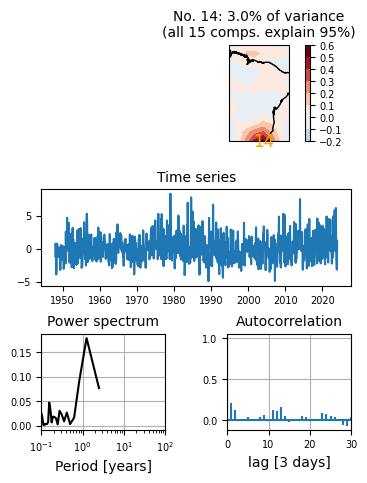

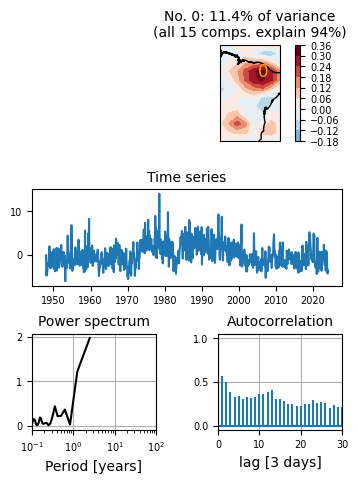

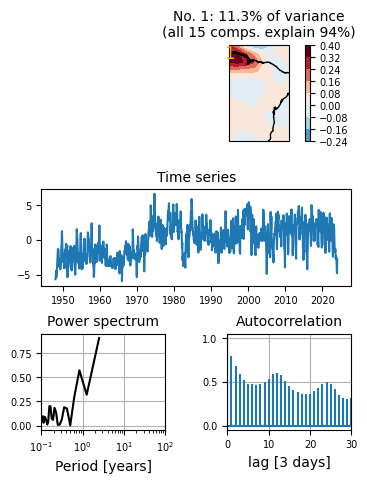

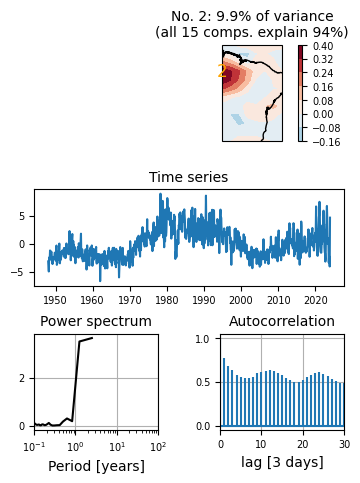

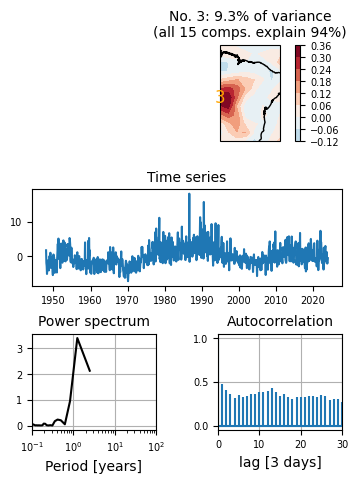

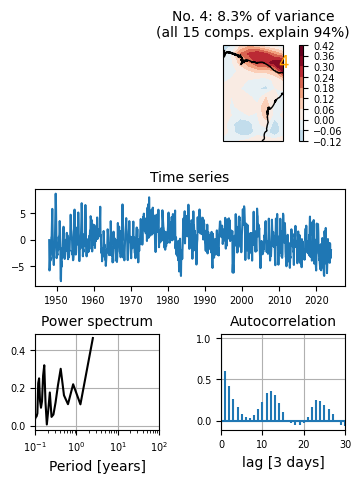

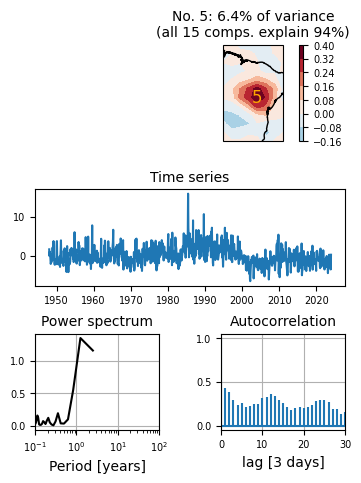

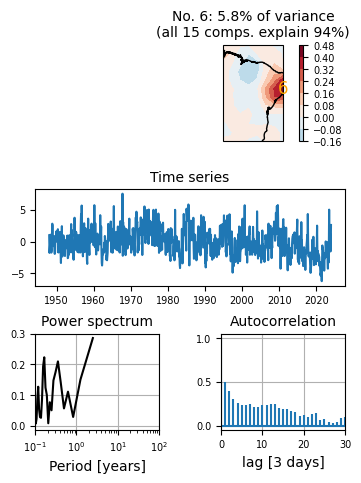

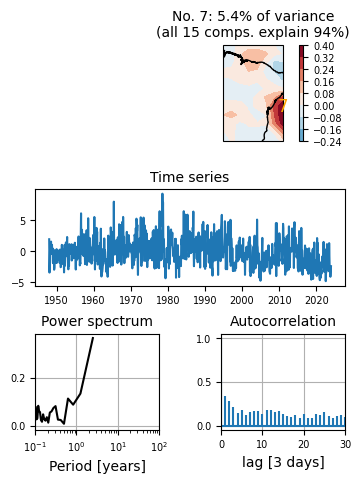

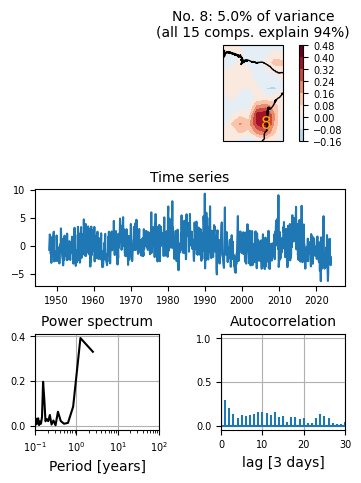

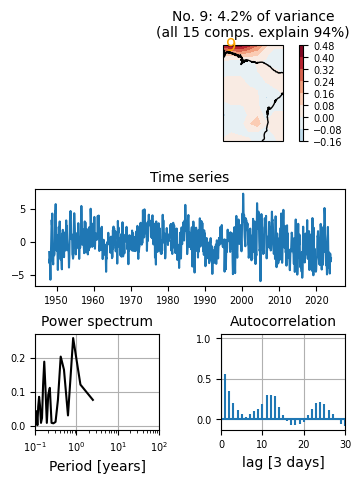

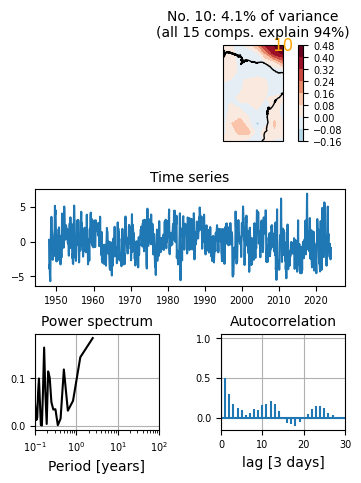

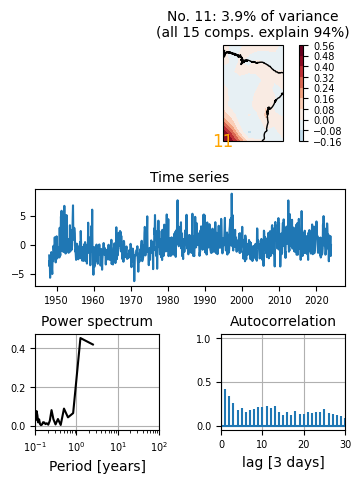

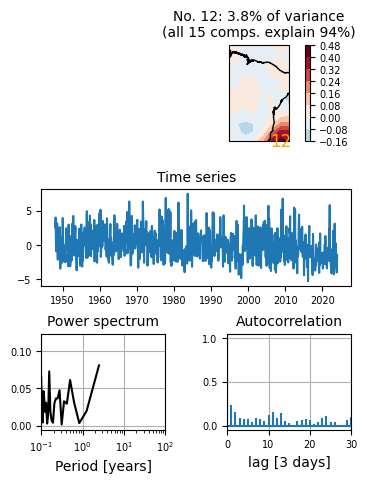

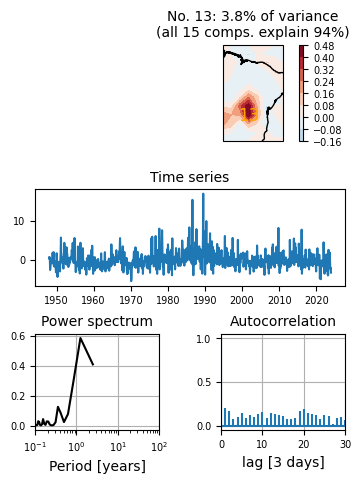

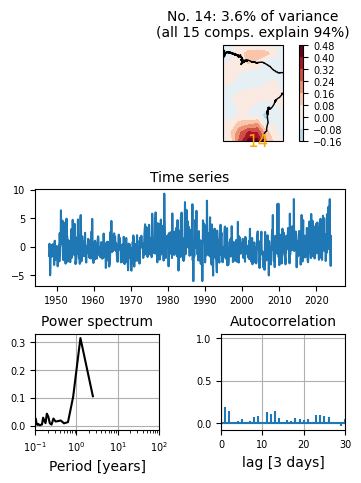

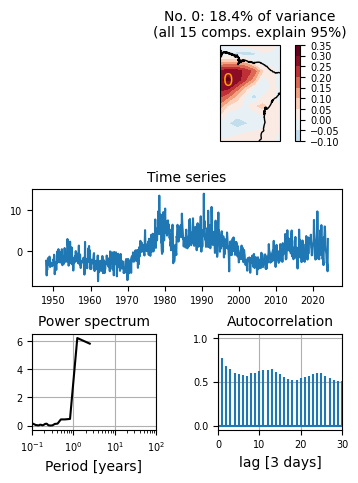

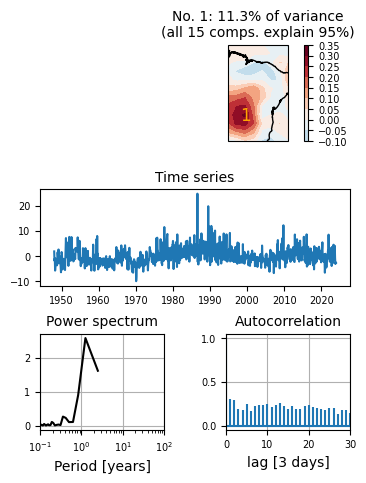

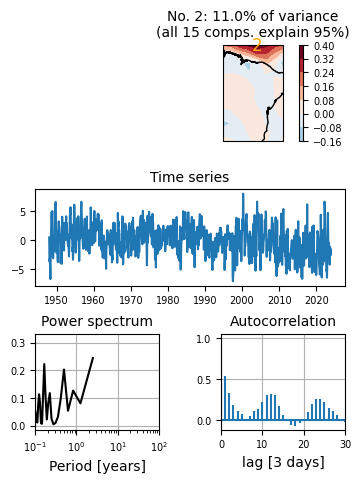

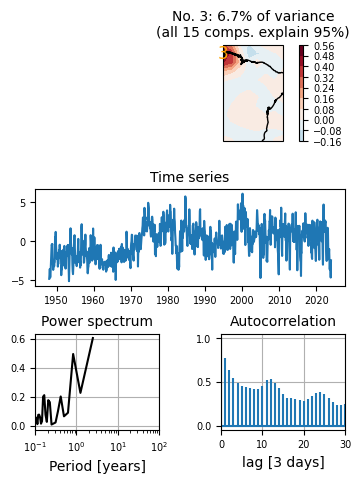

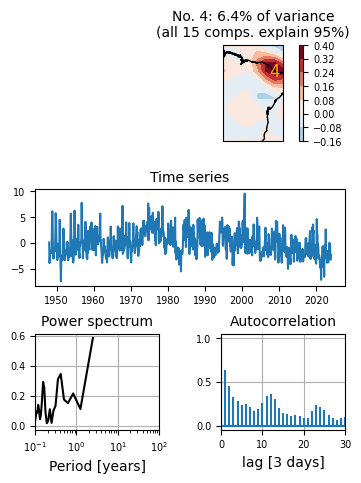

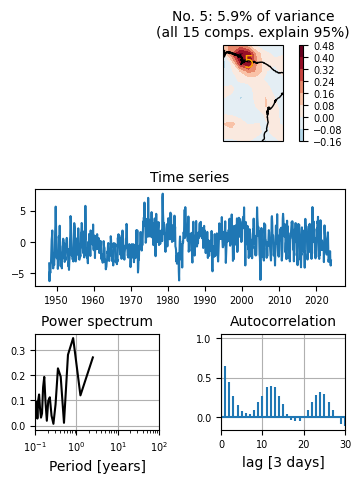

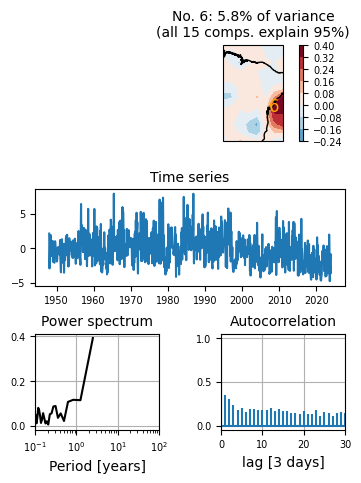

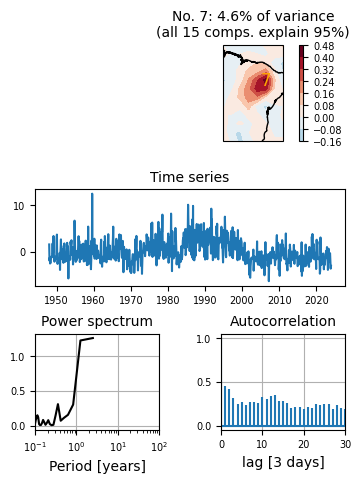

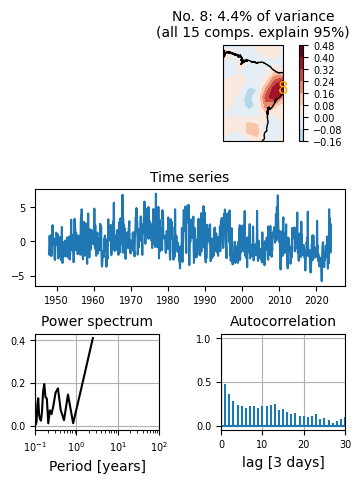

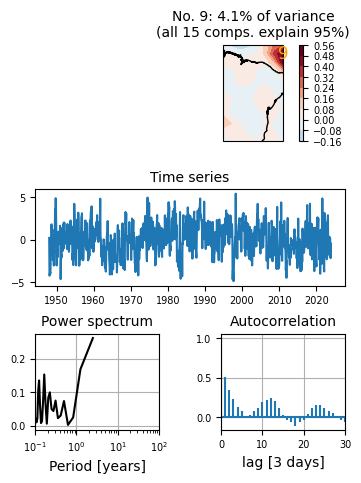

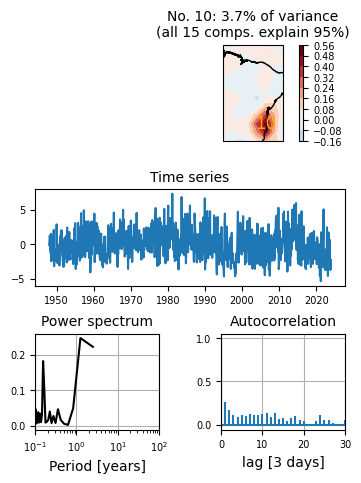

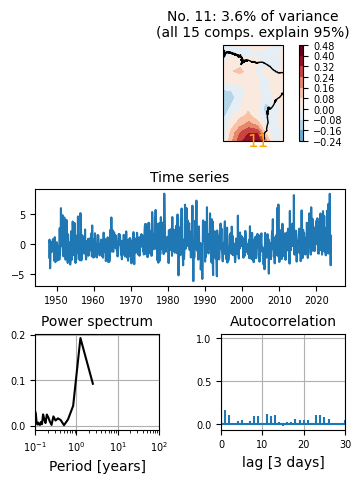

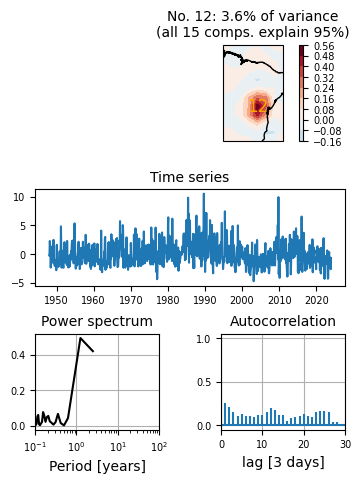

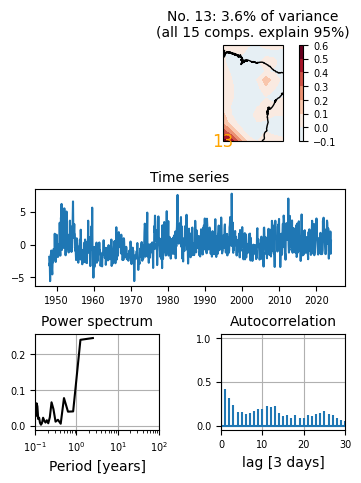

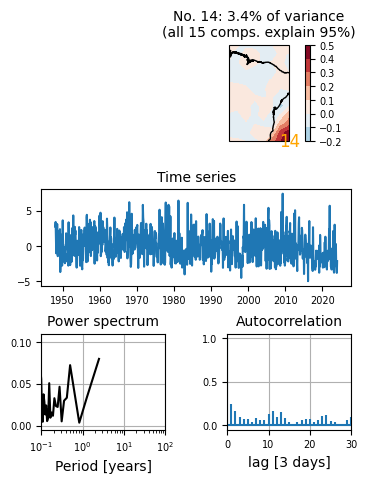

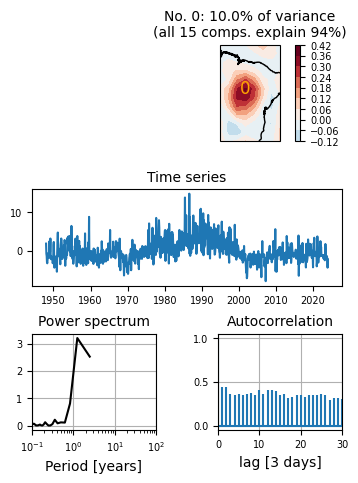

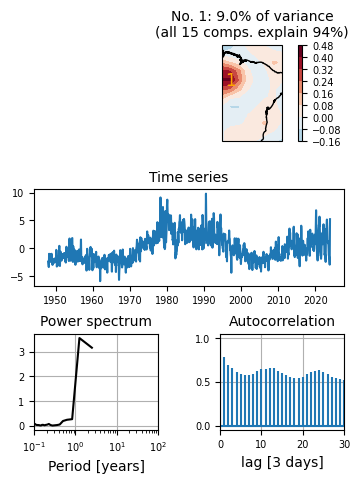

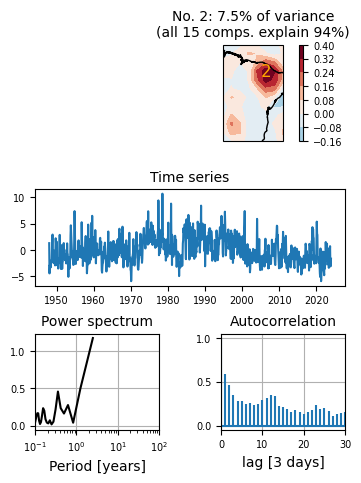

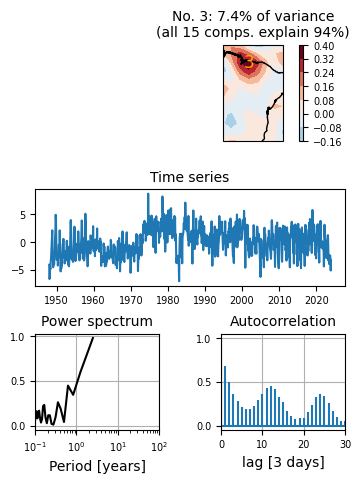

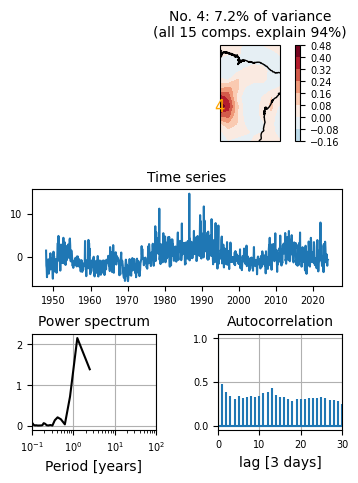

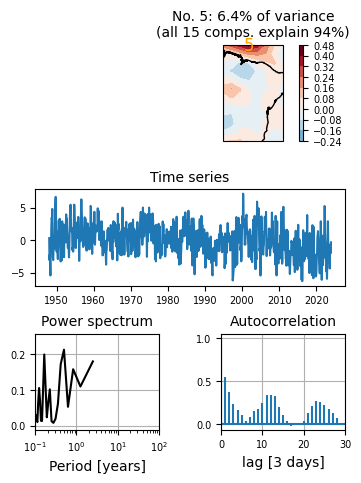

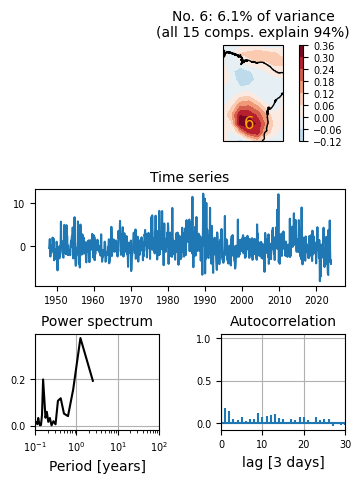

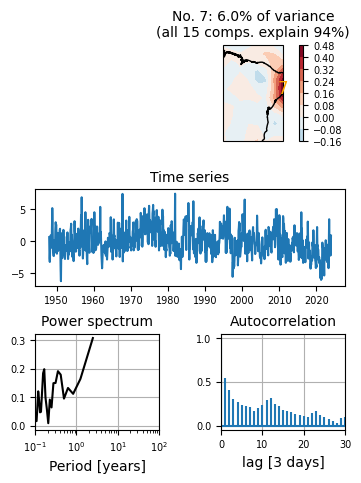

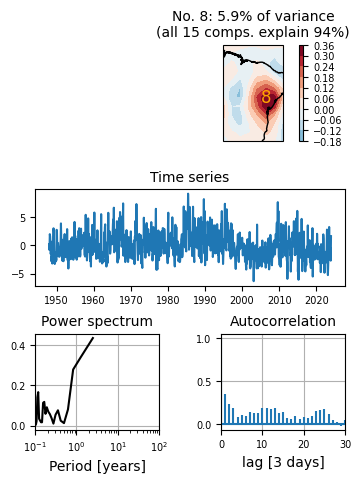

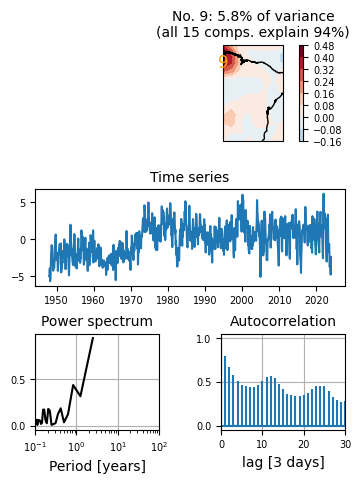

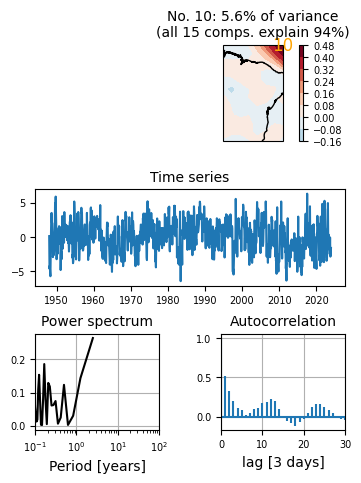

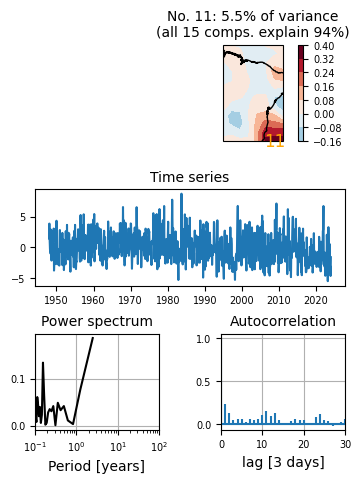

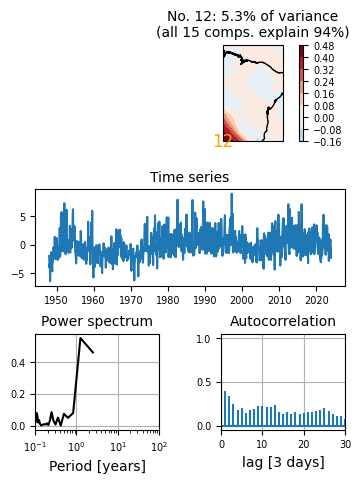

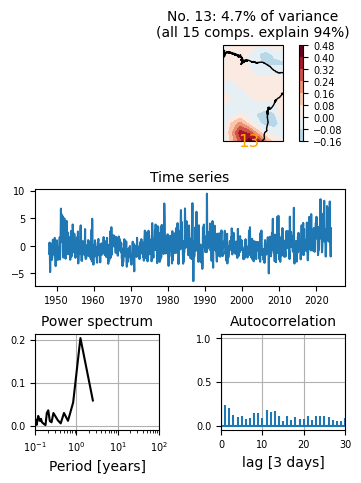

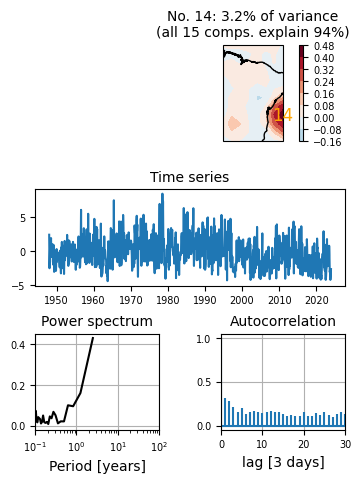

In [6]:
for file, var, bounds in zip(file_names, variables, boundaries):
    print(file, var, bounds)
    d = {}
            
    d['data_parameters'] = {
        'folder_name' : './data/',
        'load_filename' :  file, # 'SLP_NCEP_NCAR_Reanalysis_1948-2024_detrend.nc',
        'varname' : var,
                  
        'use_cdftime' : True,
        'from_date' : train_dates[0] if train else test_dates[0], #datetime(1848, 1, 1), # datetime(1848, 1, 1),   # datetime object
        'to_date' : train_dates[1] if train else test_dates[1], #datetime(2209, 1, 1), # datetime(1855, 1, 1),
        'anomalize': 'means_variance',
        'anomalize_base' :  (1948, 2022) if train else (2022, 2024),
        'slice_lat' : bounds['lats'],
        'slice_lon' : bounds['lons'],
        'level' : None,   
        'verbosity' : 2,
        }

    d['preprocessing_parameters'] = {
        'detrend' : False,
        'cos_reweighting' : True,
        'verbosity' : 2,
        }
  
    geo_object = load_data(**d['data_parameters'])
    geo_object = preprocess_data(geo_object, **d['preprocessing_parameters'])

    for month_mask in [[2, 3, 4], [5, 6, 7], [8, 9, 10], [11, 12, 1]]: # [[12, 1, 2], [3, 4, 5], [6, 7, 8], [9, 10, 11]]
      for i in range(len(components)):
        d['varimax_parameters'] = {
            'verbosity' : 2,
            'truncate_by' : 'max_comps',   # 'max_comps'  OR 'fraction_explained_variance'
            'fraction_explained_variance' : 0.95,
            'max_comps' : components[i],
            'month_mask' : month_mask, # [12, 1, 2],    # [1,2,3,4,5,6,7,8,9,10,11,12]
            }

        ## Adapt to your needs:
        save_filename = ''
        if train:
          save_filename += 'train_'
        if var == 'sst':
          save_filename += 'varimax_FULL_%s' % (d['data_parameters']['load_filename'])
        else: 
          save_filename += 'varimax_%s' % (d['data_parameters']['load_filename'])
        save_filename += '_3dm_comps-%s' % (d['varimax_parameters']['max_comps'])

        if d['varimax_parameters']['month_mask'] is not None:
          save_filename += '_months-%s' % (d['varimax_parameters']['month_mask'])
          save_filename += '.bin'
                        
        print("Running script to generate %s" % save_folder + save_filename)
                      
        d['results'] = get_varimax_loadings(geo_object, **d['varimax_parameters'])
                
        pickle.dump(d, open(save_folder + save_filename, 'wb'))
                    
        if plot_loadings:
          generate_pdf(d,  save_folder, save_filename)
